## 1. Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')

# Create figures directory if it doesn't exist
os.makedirs('figures', exist_ok=True)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("✓ Libraries imported successfully!")
print("✓ Figures directory created/verified!")

✓ Libraries imported successfully!
✓ Figures directory created/verified!


## 2. Load Cleaned Data

In [12]:
# Load cleaned dataset from Notebook 2
df = pd.read_csv('gender_education_cleaned.csv')

print(f"Dataset: {len(df):,} rows × {len(df.columns)} columns")
print(f"Countries: {df['country'].nunique()}")
print(f"Time range: {df['year'].min()}-{df['year'].max()}")
print(f"Regions: {df['region'].nunique()}")
print(f"\nColumns: {list(df.columns)}")

Dataset: 9,945 rows × 17 columns
Countries: 221
Time range: 1980-2024
Regions: 7

Columns: ['country', 'year', 'Girls_Out_Of_School_Primary', 'Literacy_Rate_Female', 'Literacy_Rate_Male', 'Adolescent_Fertility_Rate', 'Female_Labor_Force_Participation', 'region', 'Literacy_Gap', 'Literacy_Gender_Parity_Index', 'Girls_Out_Of_School_Millions', 'Girls_Out_Of_School_Primary_Scaled', 'Literacy_Rate_Female_Scaled', 'Literacy_Rate_Male_Scaled', 'Adolescent_Fertility_Rate_Scaled', 'Female_Labor_Force_Participation_Scaled', 'Gender_Equality_Index']


## 3. Descriptive Statistics

In [13]:
# Core indicators for analysis
indicator_cols = [
    'Girls_Out_Of_School_Primary',
    'Literacy_Rate_Female',
    'Literacy_Rate_Male',
    'Adolescent_Fertility_Rate',
    'Female_Labor_Force_Participation'
]

print("="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
print("\n", df[indicator_cols].describe())

# Check for any remaining missing values
missing = df[indicator_cols].isna().sum()
if missing.sum() > 0:
    print("\nRemaining missing values:")
    print(missing[missing > 0])
else:
    print("\n✓ No missing values in core indicators!")

DESCRIPTIVE STATISTICS

        Girls_Out_Of_School_Primary  Literacy_Rate_Female  Literacy_Rate_Male  \
count                 8.606000e+03           8661.000000         8661.000000   
mean                  2.498219e+05             76.320138           84.865315   
std                   7.299954e+05             23.368164           16.143469   
min                   1.000000e+01              4.590000           18.260000   
25%                   4.692250e+03             60.846157           76.974001   
50%                   3.696350e+04             85.739508           90.720001   
75%                   2.339032e+05             94.910004           97.430000   
max                   1.170813e+07            100.000000          100.000000   

       Adolescent_Fertility_Rate  Female_Labor_Force_Participation  
count                9945.000000                       9225.000000  
mean                   60.530141                         40.005735  
std                    46.970938               

## 4. Distribution Analysis

Visualize the distribution of each indicator using histograms.

Saving individual histograms...
  ✓ figure1a_histogram_literacy-rate-female.png/.svg
  ✓ figure1a_histogram_literacy-rate-female.png/.svg


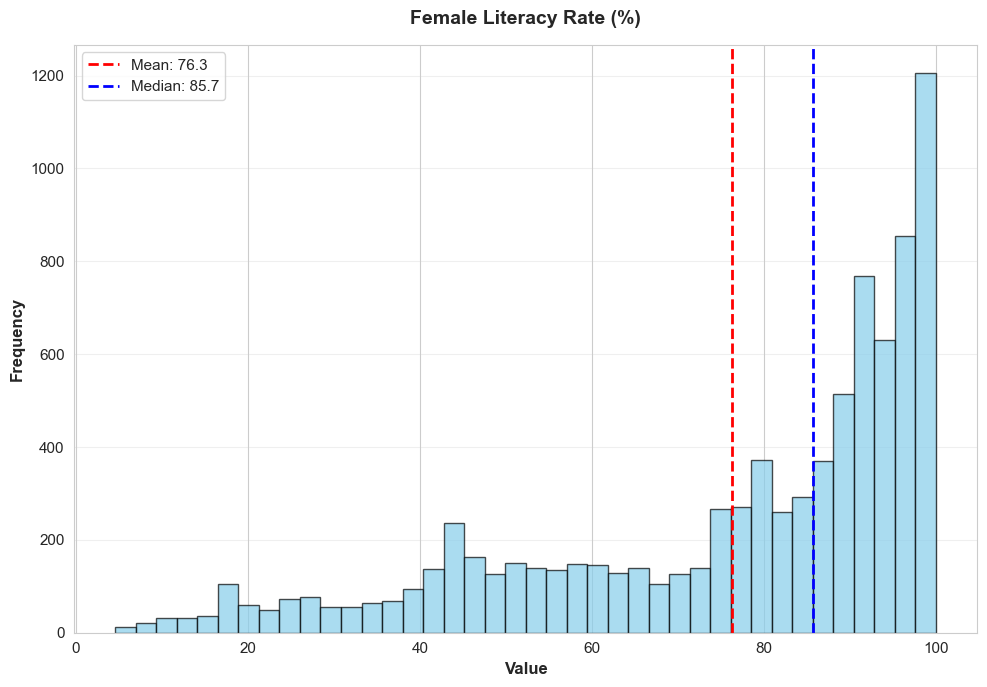

  ✓ figure1b_histogram_literacy-rate-male.png/.svg


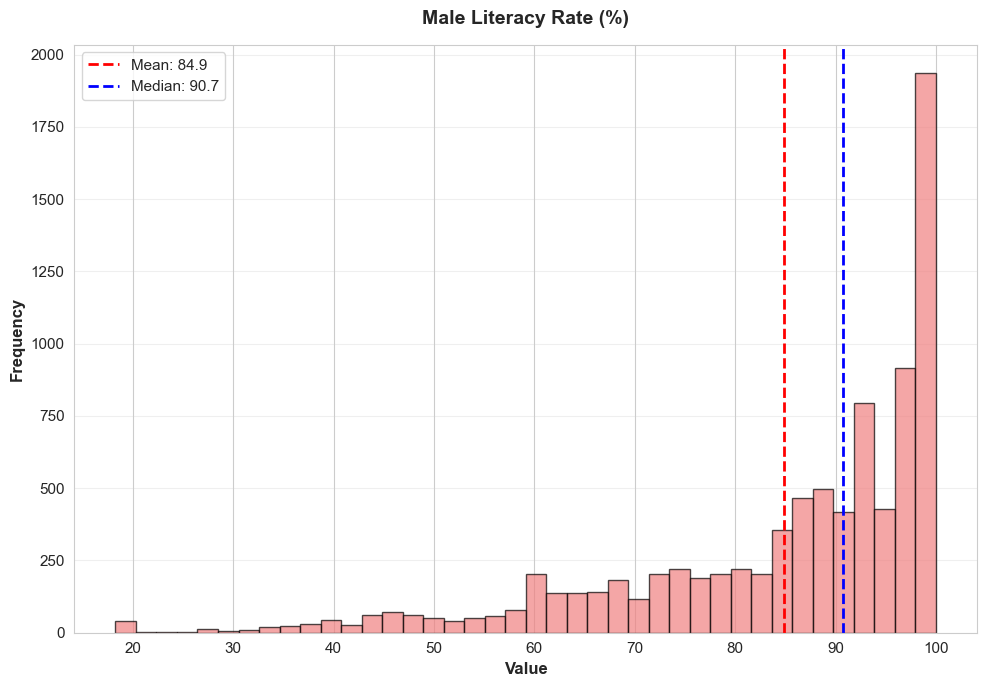

  ✓ figure1c_histogram_adolescent-fertility-rate.png/.svg


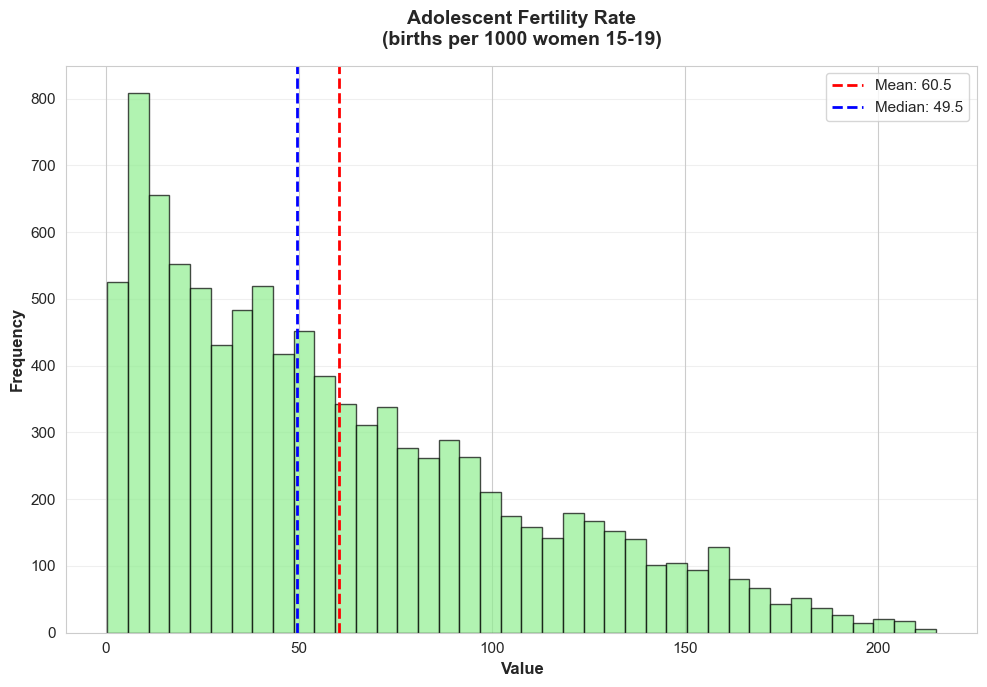

  ✓ figure1d_histogram_female-labor-force-participation.png/.svg


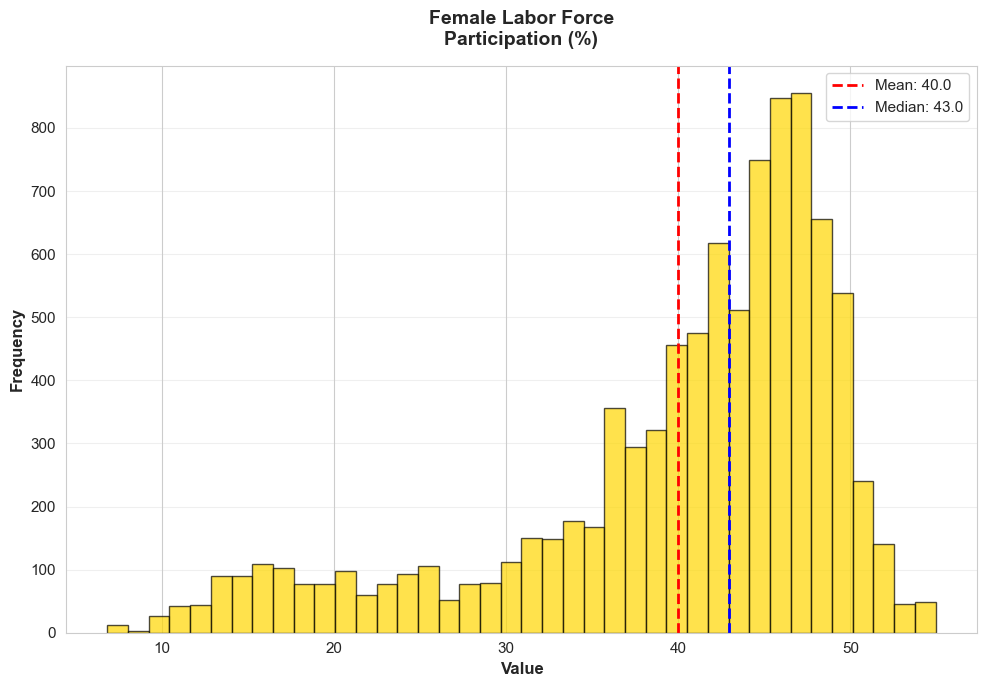

  ✓ figure1e_histogram_girls-out-of-school-primary.png/.svg


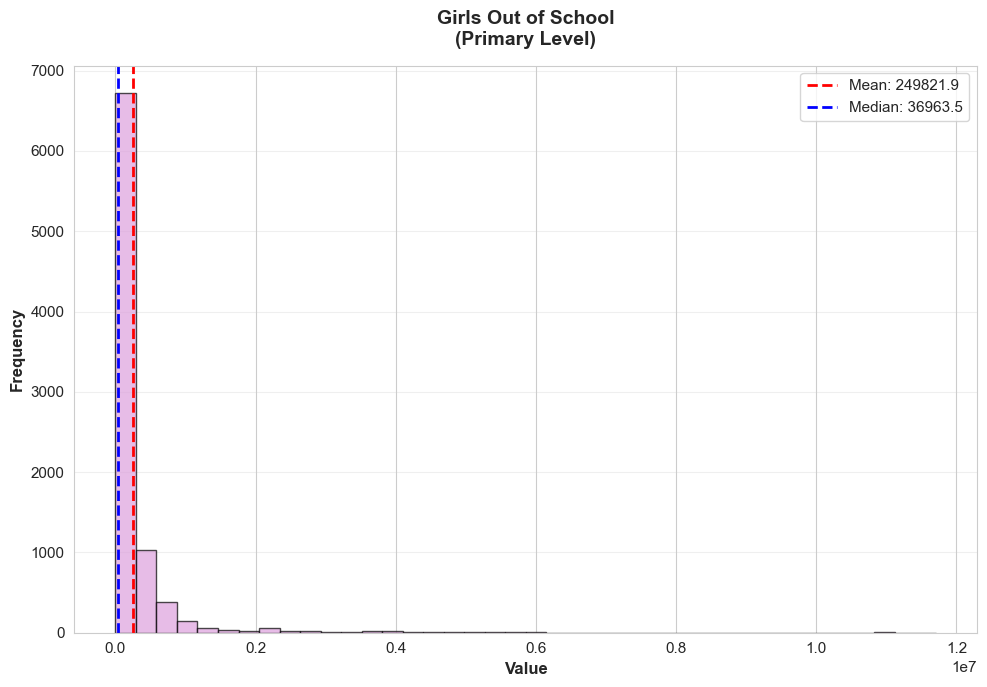

  ✓ figure1f_histogram_literacy-gap.png/.svg


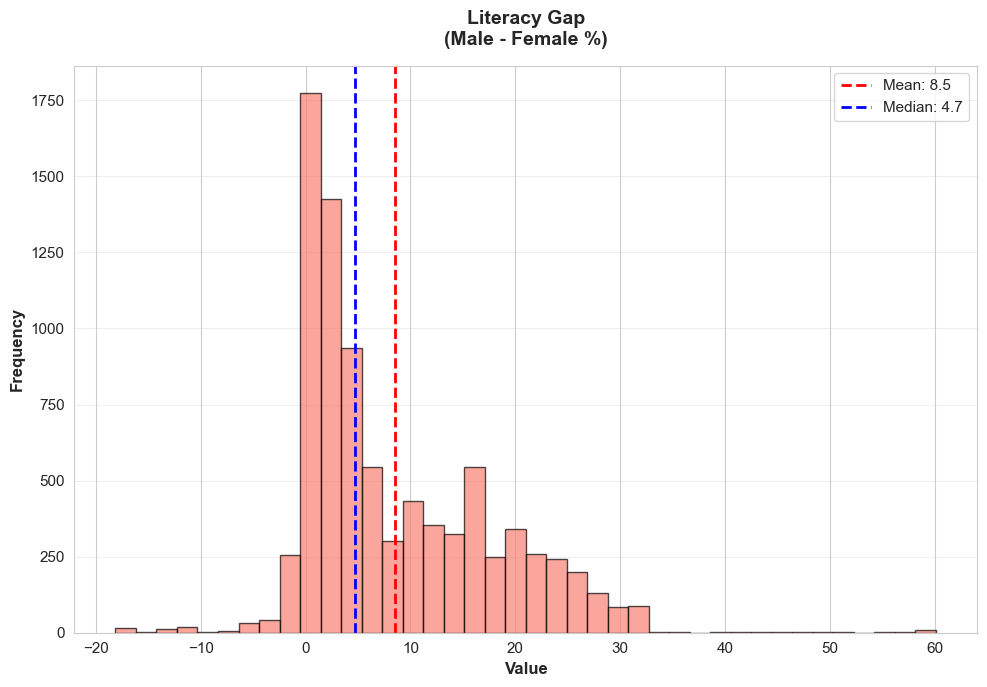


✓ Distribution plots generated


In [14]:
# Plot each indicator
indicators_to_plot = [
    ('Literacy_Rate_Female', 'Female Literacy Rate (%)', 'skyblue'),
    ('Literacy_Rate_Male', 'Male Literacy Rate (%)', 'lightcoral'),
    ('Adolescent_Fertility_Rate', 'Adolescent Fertility Rate\n(births per 1000 women 15-19)', 'lightgreen'),
    ('Female_Labor_Force_Participation', 'Female Labor Force\nParticipation (%)', 'gold'),
    ('Girls_Out_Of_School_Primary', 'Girls Out of School\n(Primary Level)', 'plum'),
    ('Literacy_Gap', 'Literacy Gap\n(Male - Female %)', 'salmon')
]

print("Saving individual histograms...")
for idx, (col, title, color) in enumerate(indicators_to_plot):
    if col in df.columns:
        data = df[col].dropna()
        
        fig_single, ax_single = plt.subplots(figsize=(10, 7))
        ax_single.hist(data, bins=40, color=color, edgecolor='black', alpha=0.7)
        ax_single.set_title(title, fontsize=14, fontweight='bold', pad=15)
        ax_single.set_xlabel('Value', fontsize=12, fontweight='bold')
        ax_single.set_ylabel('Frequency', fontsize=12, fontweight='bold')
        ax_single.grid(axis='y', alpha=0.3)
        
        # Add statistics
        mean_val = data.mean()
        median_val = data.median()
        ax_single.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
        ax_single.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
        ax_single.legend(fontsize=11)
        
        plt.tight_layout()
        
        # Create clean filename
        filename = col.lower().replace('_', '-')
        plt.savefig(f'figures/figure1{chr(97+idx)}_histogram_{filename}.png', dpi=300, bbox_inches='tight')
        plt.savefig(f'figures/figure1{chr(97+idx)}_histogram_{filename}.svg', bbox_inches='tight')
        
        print(f"  ✓ figure1{chr(97+idx)}_histogram_{filename}.png/.svg")
        
        plt.show()
        plt.close()

print("\n✓ Distribution plots generated")

## 5. Regional Comparison: Box Plots

Compare indicator distributions across world regions.

Saving individual box plots...
  ✓ figure2a_boxplot_literacy-rate-female.png/.svg
  ✓ figure2a_boxplot_literacy-rate-female.png/.svg


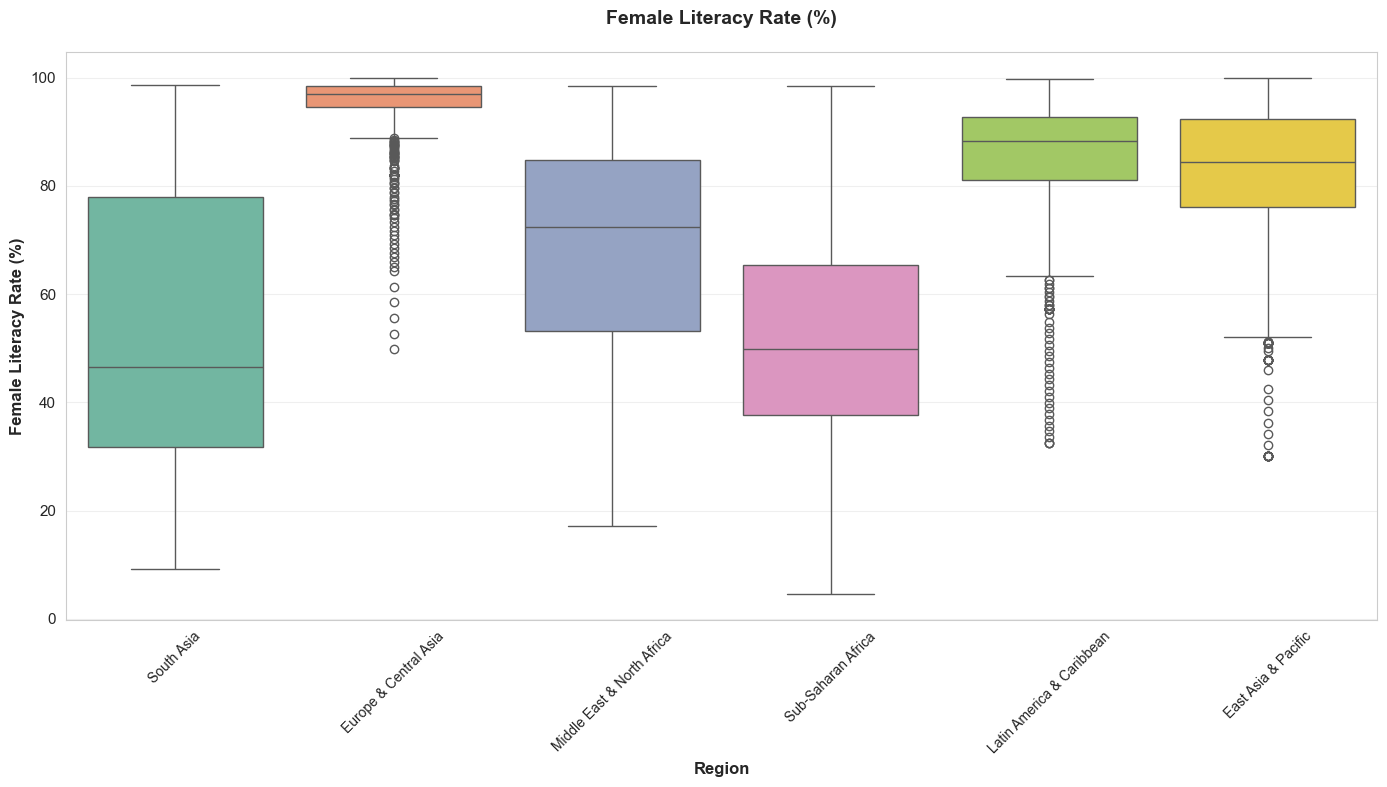

  ✓ figure2b_boxplot_adolescent-fertility-rate.png/.svg


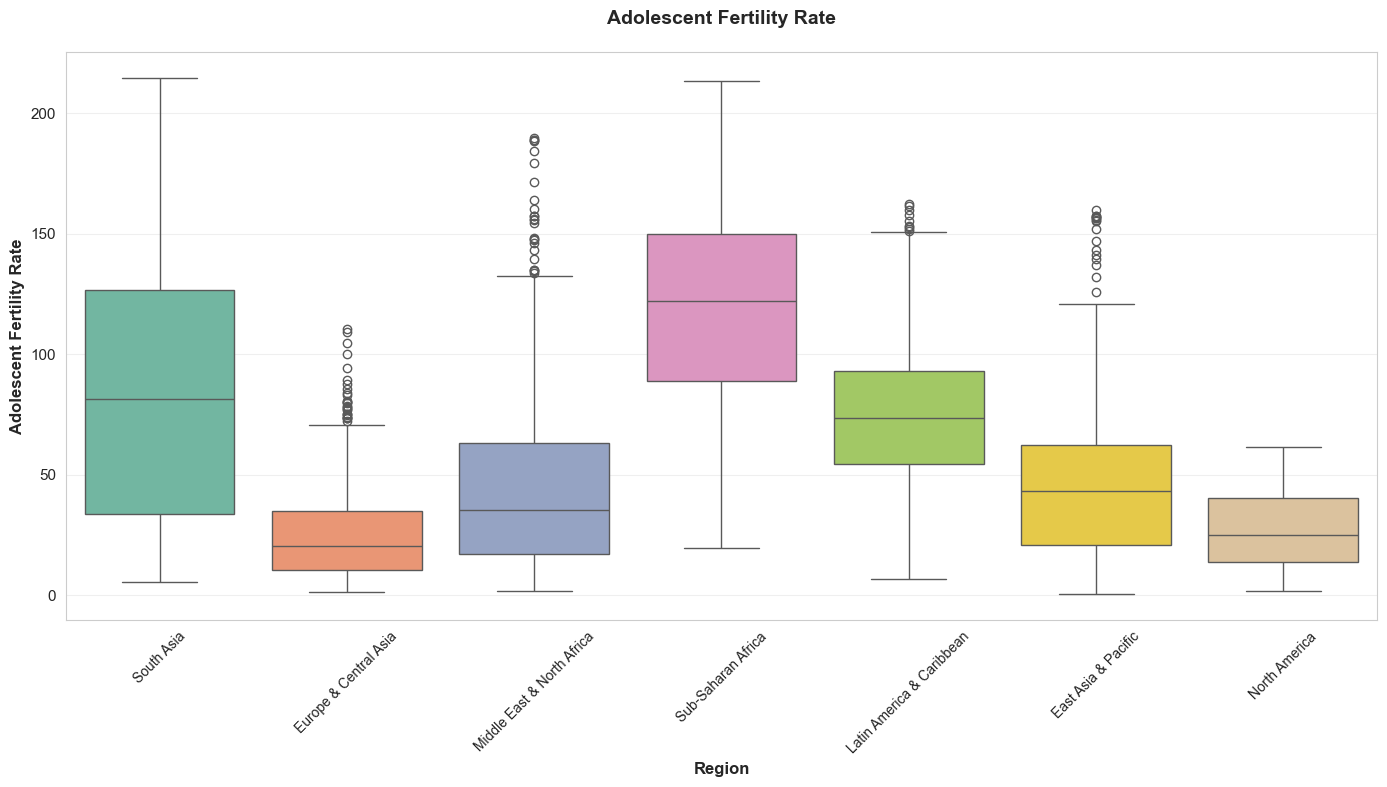

  ✓ figure2c_boxplot_female-labor-force-participation.png/.svg


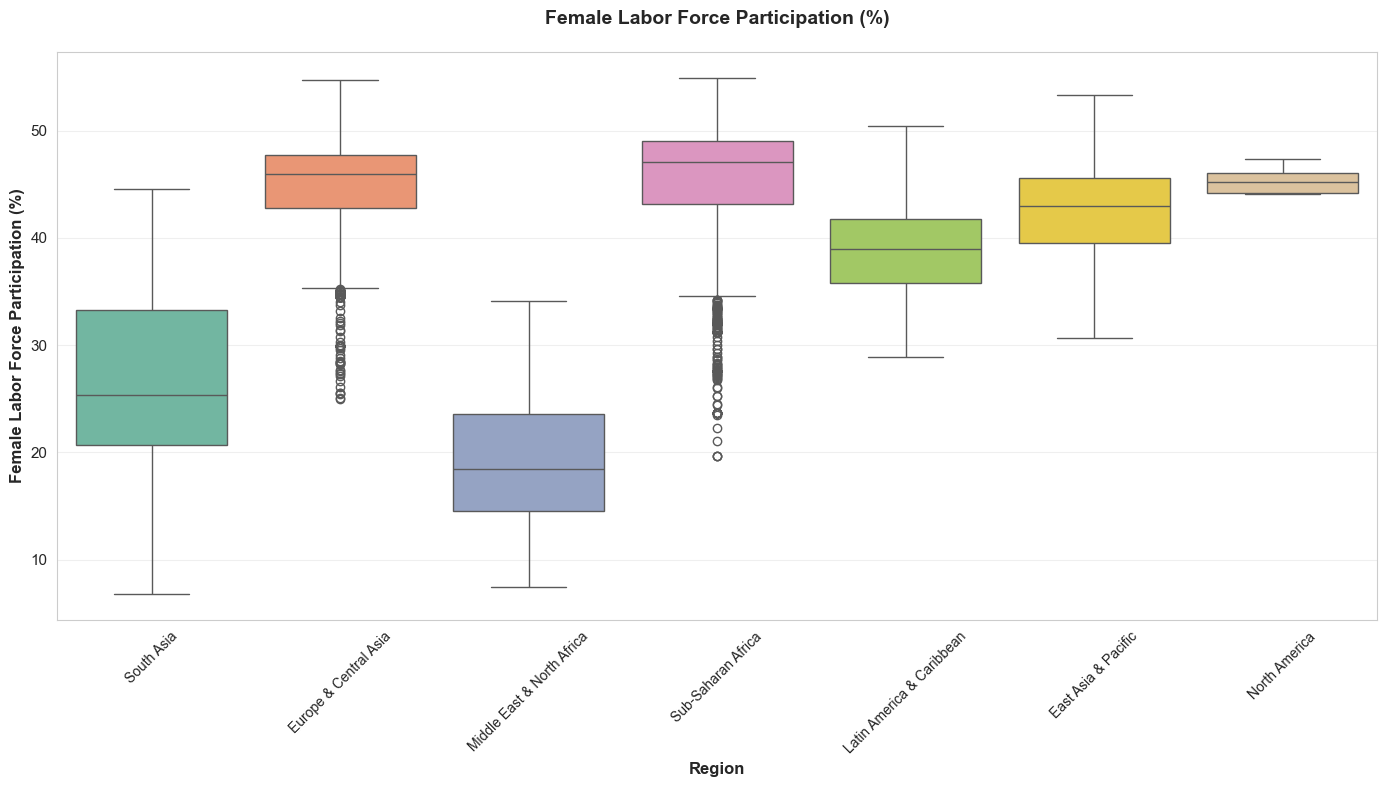

  ✓ figure2d_boxplot_literacy-gap.png/.svg


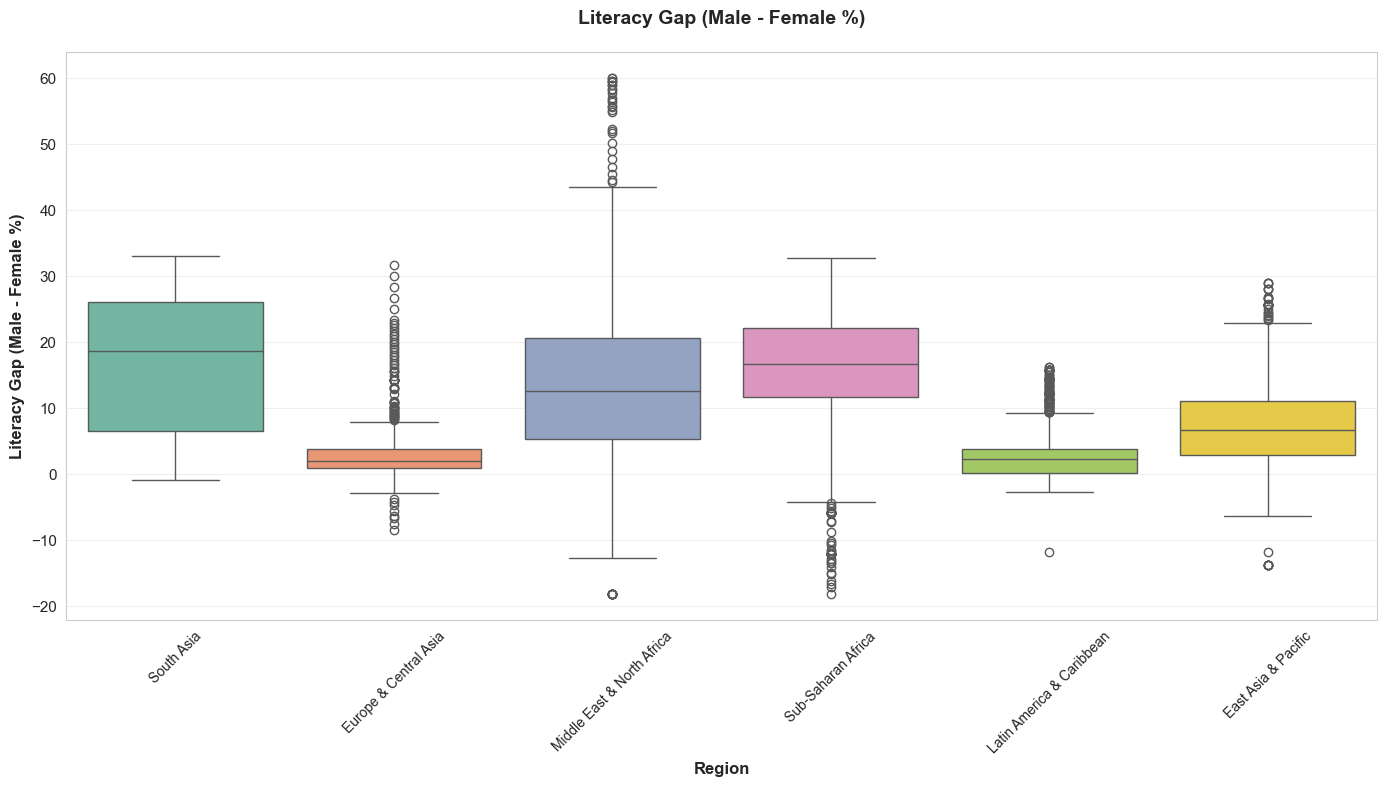


✓ Regional box plots generated


In [15]:
# Select key indicators for regional comparison
key_indicators = [
    ('Literacy_Rate_Female', 'Female Literacy Rate (%)'),
    ('Adolescent_Fertility_Rate', 'Adolescent Fertility Rate'),
    ('Female_Labor_Force_Participation', 'Female Labor Force Participation (%)'),
    ('Literacy_Gap', 'Literacy Gap (Male - Female %)')
]

print("Saving individual box plots...")
for idx, (col, title) in enumerate(key_indicators):
    if col in df.columns:
        df_plot = df[df[col].notna() & df['region'].notna()]
        
        fig_single, ax_single = plt.subplots(figsize=(14, 8))
        sns.boxplot(data=df_plot, x='region', y=col, ax=ax_single, palette='Set2')
        
        ax_single.set_title(title, fontsize=14, fontweight='bold', pad=20)
        ax_single.set_xlabel('Region', fontsize=12, fontweight='bold')
        ax_single.set_ylabel(title, fontsize=12, fontweight='bold')
        ax_single.tick_params(axis='x', rotation=45, labelsize=10)
        ax_single.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        
        # Create clean filename
        filename = col.lower().replace('_', '-')
        plt.savefig(f'figures/figure2{chr(97+idx)}_boxplot_{filename}.png', dpi=300, bbox_inches='tight')
        plt.savefig(f'figures/figure2{chr(97+idx)}_boxplot_{filename}.svg', bbox_inches='tight')
        
        print(f"  ✓ figure2{chr(97+idx)}_boxplot_{filename}.png/.svg")
        
        plt.show()
        plt.close()

print("\n✓ Regional box plots generated")

## 6. Temporal Trends: Line Plots

Analyze how indicators have changed over time (1980-2024).

Saving individual time-series plots...
  ✓ figure3a_timeseries_literacy-rate-female.png/.svg
  ✓ figure3a_timeseries_literacy-rate-female.png/.svg


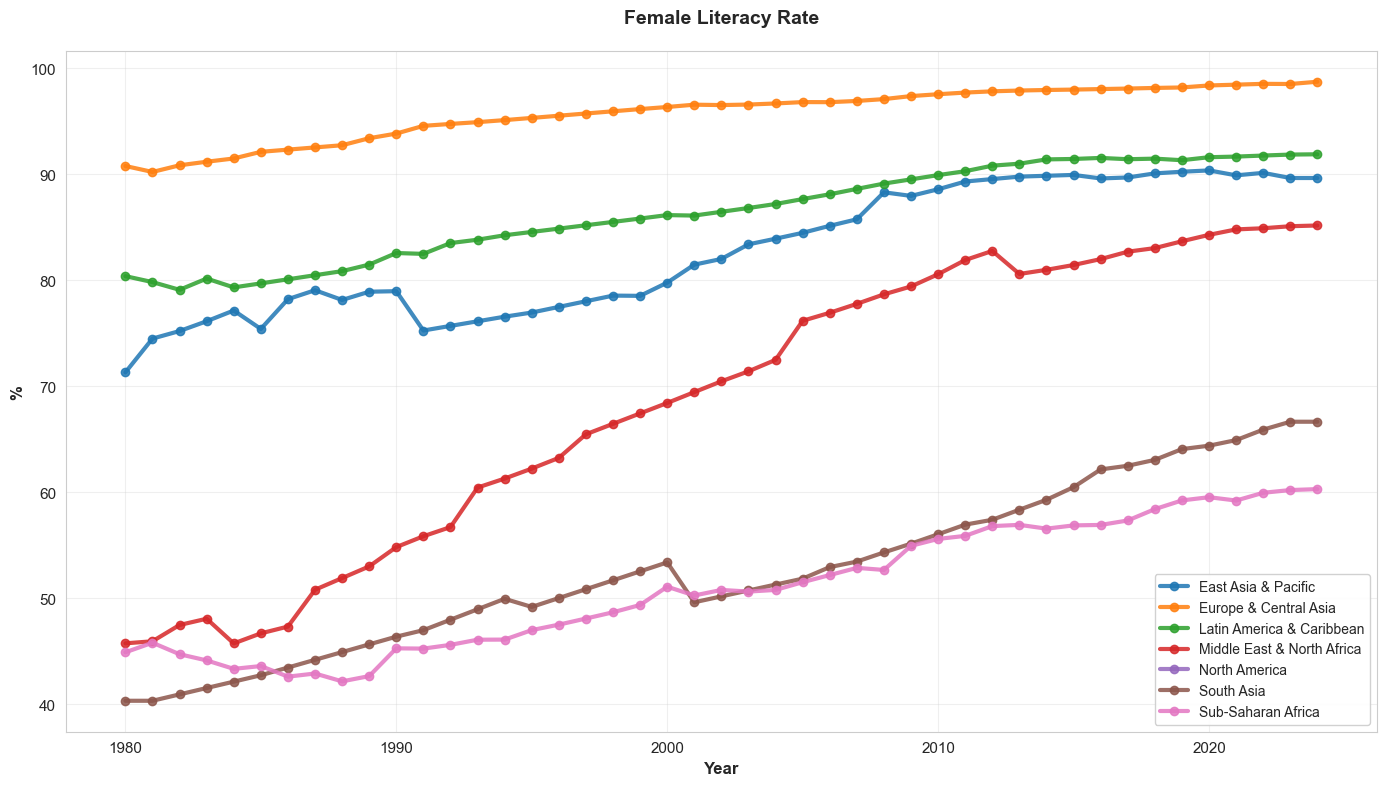

  ✓ figure3b_timeseries_adolescent-fertility-rate.png/.svg


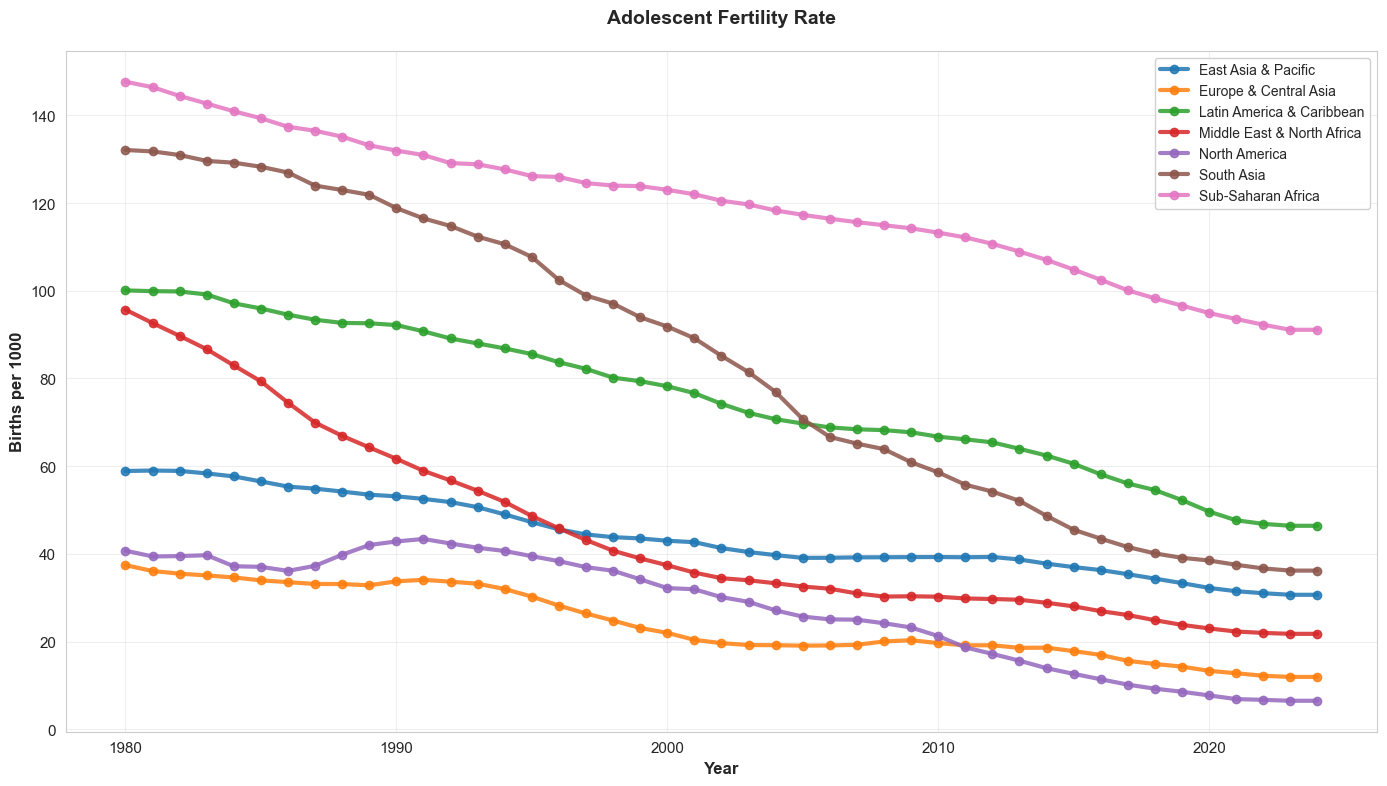

  ✓ figure3c_timeseries_female-labor-force-participation.png/.svg


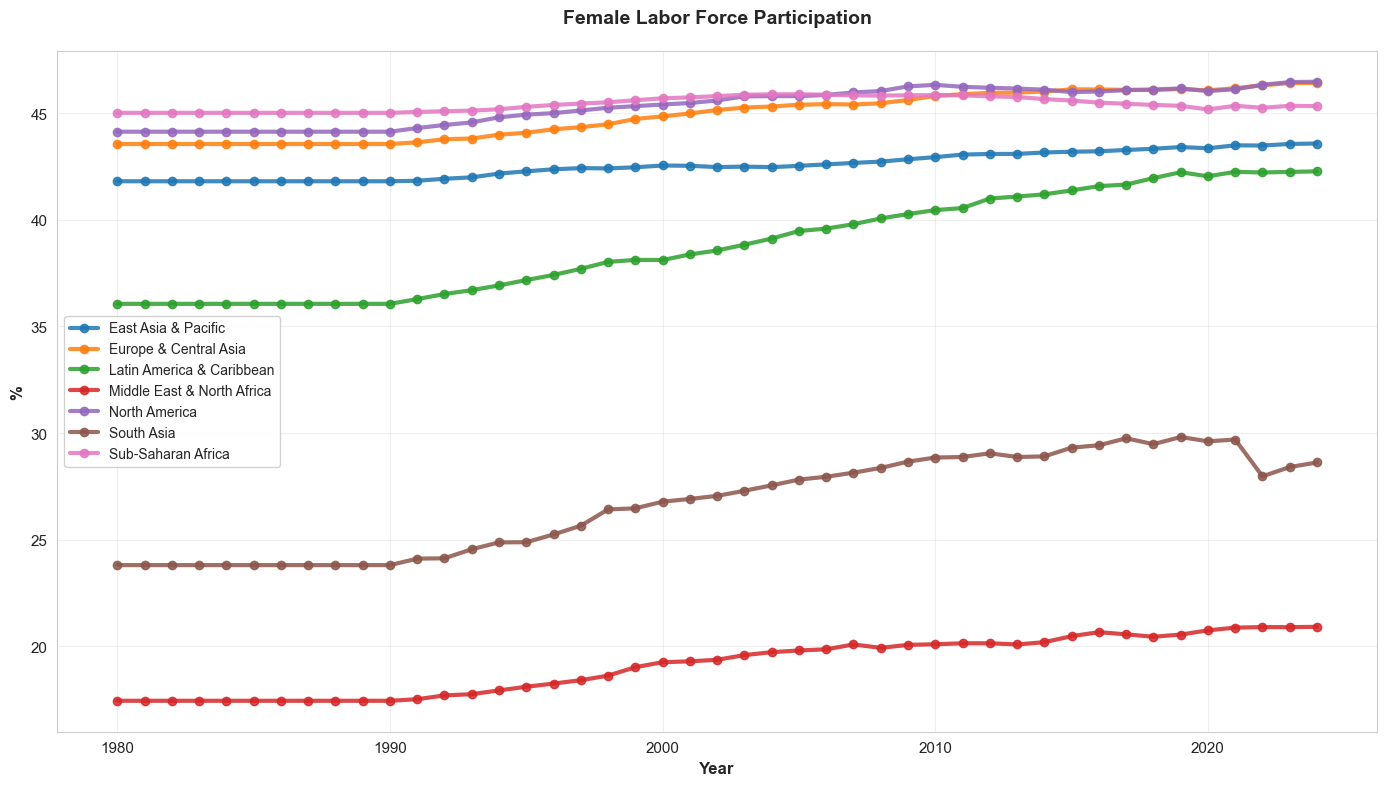


✓ Temporal trend plots generated


In [16]:
# Calculate yearly averages by region
yearly_trends = df.groupby(['year', 'region'])[indicator_cols].mean().reset_index()

# Plot trends for key indicators
trend_indicators = [
    ('Literacy_Rate_Female', 'Female Literacy Rate', '%'),
    ('Adolescent_Fertility_Rate', 'Adolescent Fertility Rate', 'Births per 1000'),
    ('Female_Labor_Force_Participation', 'Female Labor Force Participation', '%'),
    ('Literacy_Gap', 'Gender Literacy Gap', '% (M - F)')
]

print("Saving individual time-series plots...")
for idx, (col, title, ylabel) in enumerate(trend_indicators):
    if col in yearly_trends.columns:
        fig_single, ax_single = plt.subplots(figsize=(14, 8))
        
        # Plot each region
        for region in yearly_trends['region'].dropna().unique():
            region_data = yearly_trends[yearly_trends['region'] == region]
            ax_single.plot(region_data['year'], region_data[col], marker='o', 
                          linewidth=3, markersize=6, label=region, alpha=0.85)
        
        ax_single.set_title(title, fontsize=14, fontweight='bold', pad=20)
        ax_single.set_xlabel('Year', fontsize=12, fontweight='bold')
        ax_single.set_ylabel(ylabel, fontsize=12, fontweight='bold')
        ax_single.legend(loc='best', fontsize=10, framealpha=0.9)
        ax_single.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        # Create clean filename
        filename = col.lower().replace('_', '-')
        plt.savefig(f'figures/figure3{chr(97+idx)}_timeseries_{filename}.png', dpi=300, bbox_inches='tight')
        plt.savefig(f'figures/figure3{chr(97+idx)}_timeseries_{filename}.svg', bbox_inches='tight')
        
        print(f"  ✓ figure3{chr(97+idx)}_timeseries_{filename}.png/.svg")
        
        plt.show()
        plt.close()

print("\n✓ Temporal trend plots generated")

## 7. Correlation Analysis

Explore relationships between different indicators using a correlation heatmap.

✓ Saved: figure4_correlation_heatmap.png/.svg


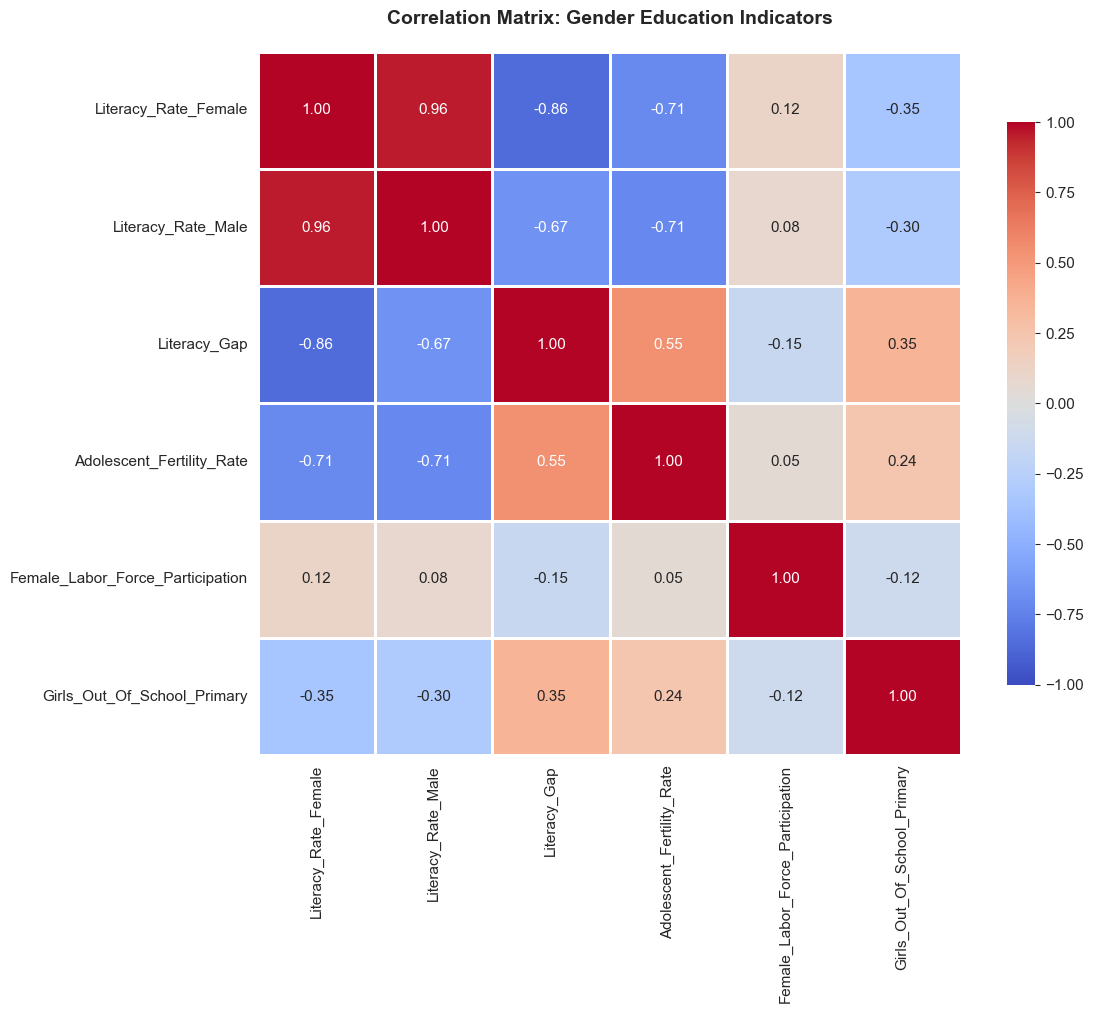


✓ Correlation heatmap generated

Key Correlations:
Literacy_Rate_Female <-> Literacy_Rate_Male: 0.956
Literacy_Rate_Female <-> Literacy_Gap: -0.858
Literacy_Rate_Male <-> Adolescent_Fertility_Rate: -0.712
Literacy_Rate_Female <-> Adolescent_Fertility_Rate: -0.708
Literacy_Rate_Male <-> Literacy_Gap: -0.670


In [17]:
# Select numeric columns for correlation
numeric_cols = [
    'Literacy_Rate_Female', 'Literacy_Rate_Male', 'Literacy_Gap',
    'Adolescent_Fertility_Rate', 'Female_Labor_Force_Participation',
    'Girls_Out_Of_School_Primary'
]

# Calculate correlation matrix
corr_data = df[numeric_cols].dropna()
correlation_matrix = corr_data.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('Correlation Matrix: Gender Education Indicators', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()

# Save figure
plt.savefig('figures/figure4_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/figure4_correlation_heatmap.svg', bbox_inches='tight')
print("✓ Saved: figure4_correlation_heatmap.png/.svg")

plt.show()

print("\n✓ Correlation heatmap generated")
print("\nKey Correlations:")
print("=" * 60)

# Find strongest correlations (excluding diagonal)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append((
            correlation_matrix.columns[i],
            correlation_matrix.columns[j],
            correlation_matrix.iloc[i, j]
        ))

# Sort by absolute correlation value
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr_val in corr_pairs[:5]:
    print(f"{var1} <-> {var2}: {corr_val:.3f}")

## 8. Gender Parity Analysis

LITERACY GENDER PARITY INDEX BY REGION

(1.0 = perfect parity, <1.0 = female disadvantage, >1.0 = male disadvantage)

                             mean  median    std    min    max
region                                                        
East Asia & Pacific         0.913   0.928  0.082  0.646  1.164
Europe & Central Asia       0.972   0.980  0.034  0.612  1.095
Latin America & Caribbean   0.967   0.975  0.042  0.799  1.159
Middle East & North Africa  0.814   0.853  0.171  0.221  1.320
North America                 NaN     NaN    NaN    NaN    NaN
South Asia                  0.709   0.707  0.205  0.289  1.010
Sub-Saharan Africa          0.725   0.729  0.179  0.251  1.320
✓ Saved: figure5a_gender_parity_regional.png/.svg
✓ Saved: figure5a_gender_parity_regional.png/.svg


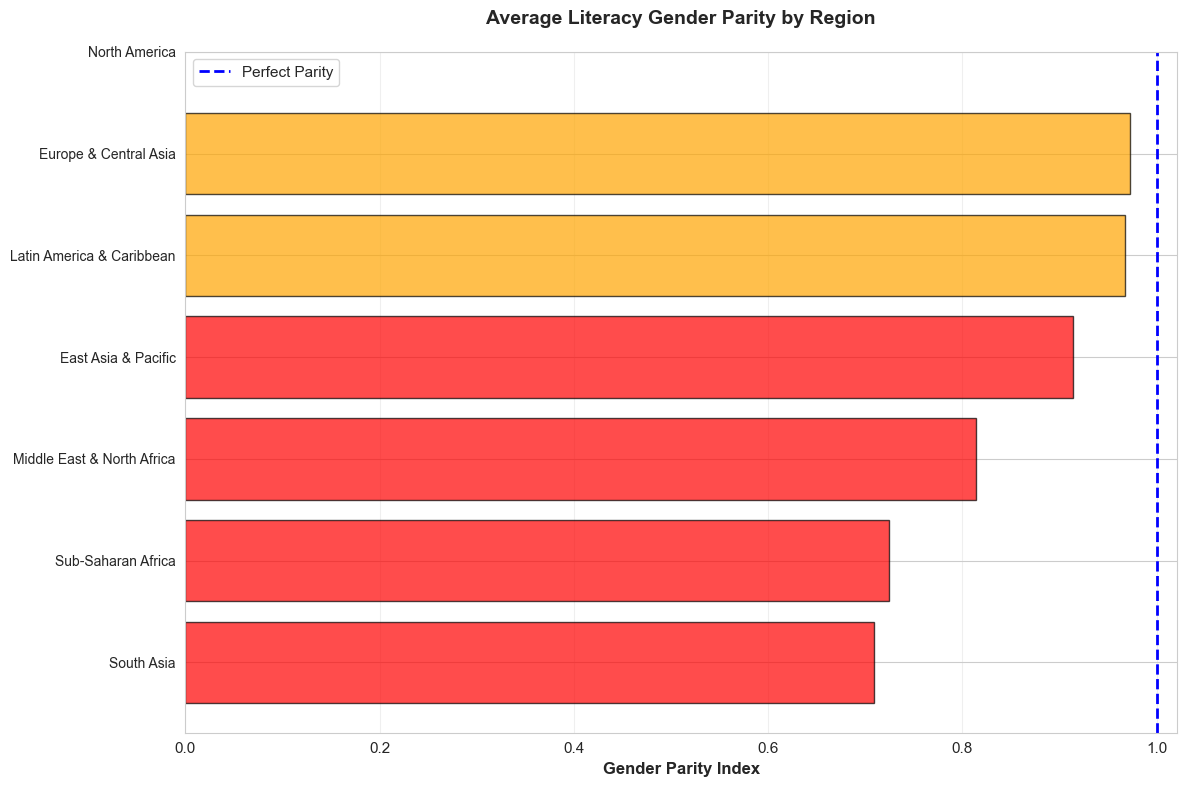

✓ Saved: figure5b_gender_parity_temporal.png/.svg


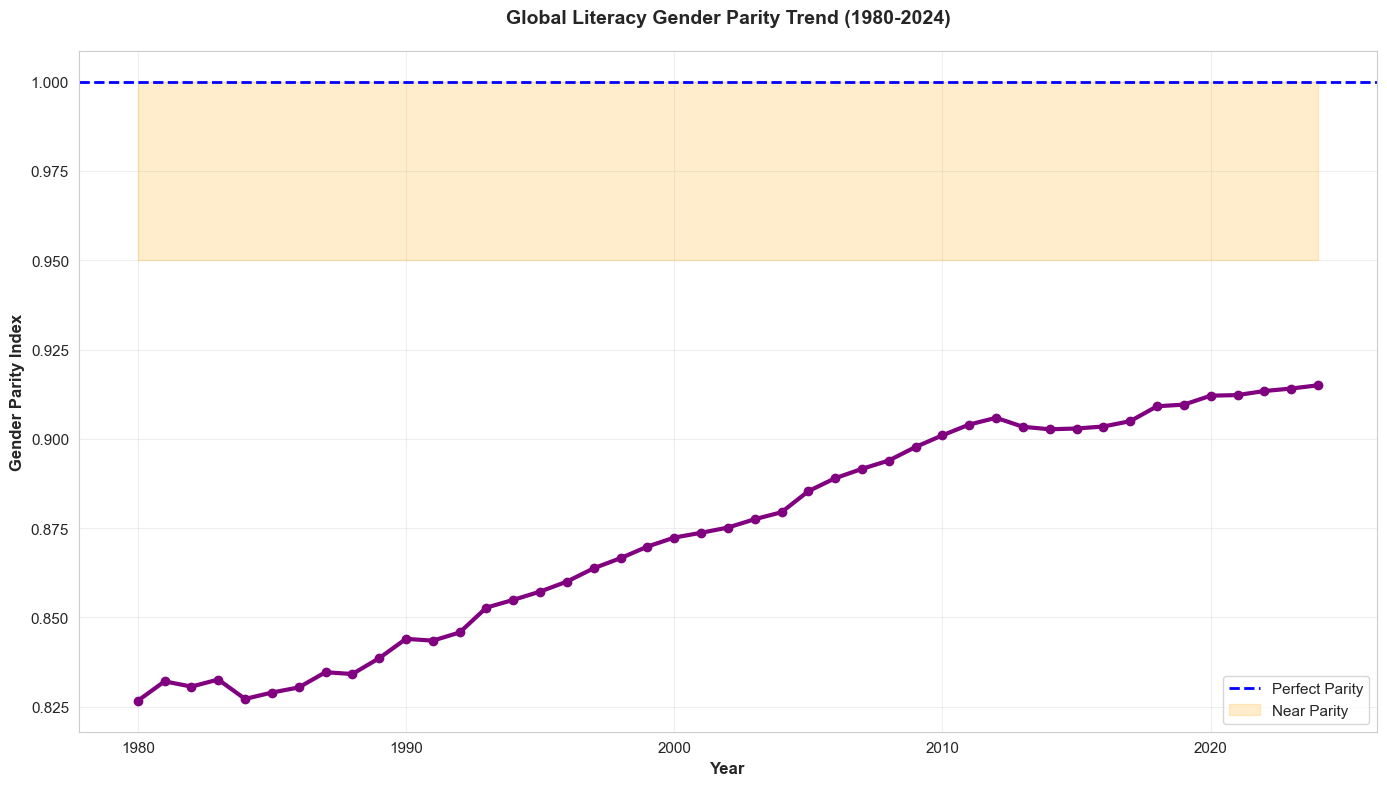


✓ Gender parity analysis complete


In [18]:
if 'Literacy_Gender_Parity_Index' in df.columns:
    # Calculate parity statistics
    parity_stats = df.groupby('region')['Literacy_Gender_Parity_Index'].agg([
        'mean', 'median', 'std', 'min', 'max'
    ]).round(3)
    
    print("="*80)
    print("LITERACY GENDER PARITY INDEX BY REGION")
    print("="*80)
    print("\n(1.0 = perfect parity, <1.0 = female disadvantage, >1.0 = male disadvantage)\n")
    print(parity_stats)
    
    # Bar chart: Average parity by region
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    region_parity = df.groupby('region')['Literacy_Gender_Parity_Index'].mean().sort_values()
    colors = ['red' if x < 0.95 else 'orange' if x < 0.98 else 'green' for x in region_parity.values]
    
    ax1.barh(range(len(region_parity)), region_parity.values, color=colors, alpha=0.7, edgecolor='black')
    ax1.set_yticks(range(len(region_parity)))
    ax1.set_yticklabels(region_parity.index, fontsize=10)
    ax1.axvline(1.0, color='blue', linestyle='--', linewidth=2, label='Perfect Parity')
    ax1.set_xlabel('Gender Parity Index', fontsize=12, fontweight='bold')
    ax1.set_title('Average Literacy Gender Parity by Region', fontsize=14, fontweight='bold', pad=20)
    ax1.legend()
    ax1.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('figures/figure5a_gender_parity_regional.png', dpi=300, bbox_inches='tight')
    plt.savefig('figures/figure5a_gender_parity_regional.svg', bbox_inches='tight')
    print("✓ Saved: figure5a_gender_parity_regional.png/.svg")
    plt.show()
    plt.close()
    
    # Time series: Global parity trend
    fig2, ax2 = plt.subplots(figsize=(14, 8))
    yearly_parity = df.groupby('year')['Literacy_Gender_Parity_Index'].mean()
    ax2.plot(yearly_parity.index, yearly_parity.values, linewidth=3, color='purple', marker='o')
    ax2.axhline(1.0, color='blue', linestyle='--', linewidth=2, label='Perfect Parity')
    ax2.fill_between(yearly_parity.index, 0.95, 1.0, alpha=0.2, color='orange', label='Near Parity')
    ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Gender Parity Index', fontsize=12, fontweight='bold')
    ax2.set_title('Global Literacy Gender Parity Trend (1980-2024)', fontsize=14, fontweight='bold', pad=20)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('figures/figure5b_gender_parity_temporal.png', dpi=300, bbox_inches='tight')
    plt.savefig('figures/figure5b_gender_parity_temporal.svg', bbox_inches='tight')
    print("✓ Saved: figure5b_gender_parity_temporal.png/.svg")
    plt.show()
    plt.close()
    
    print("\n✓ Gender parity analysis complete")

## 9. Top & Bottom Performers

In [19]:
# Get latest year data
latest_year = df['year'].max()
latest_data = df[df['year'] == latest_year].copy()

print(f"\n{'='*80}")
print(f"TOP & BOTTOM PERFORMERS ({latest_year})")
print(f"{'='*80}\n")

# Female Literacy Rate
print("FEMALE LITERACY RATE")
print("-" * 40)
top_literacy = latest_data.nlargest(10, 'Literacy_Rate_Female')[['country', 'region', 'Literacy_Rate_Female']]
print("\nTop 10:")
print(top_literacy.to_string(index=False))

bottom_literacy = latest_data.nsmallest(10, 'Literacy_Rate_Female')[['country', 'region', 'Literacy_Rate_Female']]
print("\nBottom 10:")
print(bottom_literacy.to_string(index=False))

# Gender Equality Index (if exists)
if 'Gender_Equality_Index' in latest_data.columns:
    print("\n" + "="*80)
    print("GENDER EQUALITY INDEX (Composite)")
    print("-" * 40)
    top_equality = latest_data.nlargest(10, 'Gender_Equality_Index')[['country', 'region', 'Gender_Equality_Index']]
    print("\nTop 10:")
    print(top_equality.to_string(index=False))
    
    bottom_equality = latest_data.nsmallest(10, 'Gender_Equality_Index')[['country', 'region', 'Gender_Equality_Index']]
    print("\nBottom 10:")
    print(bottom_equality.to_string(index=False))

# Literacy Gap
if 'Literacy_Gap' in latest_data.columns:
    print("\n" + "="*80)
    print("GENDER LITERACY GAP (Male - Female %)")
    print("-" * 40)
    print("\nLargest Gap (Female Disadvantage):")
    largest_gap = latest_data.nlargest(10, 'Literacy_Gap')[['country', 'region', 'Literacy_Gap']]
    print(largest_gap.to_string(index=False))
    
    print("\nSmallest/Negative Gap (Female Advantage):")
    smallest_gap = latest_data.nsmallest(10, 'Literacy_Gap')[['country', 'region', 'Literacy_Gap']]
    print(smallest_gap.to_string(index=False))


TOP & BOTTOM PERFORMERS (2024)

FEMALE LITERACY RATE
----------------------------------------

Top 10:
           country                region  Literacy_Rate_Female
             Palau   East Asia & Pacific            100.000000
        Uzbekistan Europe & Central Asia            100.000000
Russian Federation Europe & Central Asia             99.940002
           Armenia Europe & Central Asia             99.900002
      Turkmenistan Europe & Central Asia             99.900002
           Belarus Europe & Central Asia             99.879997
        Azerbaijan Europe & Central Asia             99.730003
             Nauru   East Asia & Pacific             99.720001
           Georgia Europe & Central Asia             99.620003
             Spain Europe & Central Asia             99.589996

Bottom 10:
                 country             region  Literacy_Rate_Female
                    Chad Sub-Saharan Africa             18.639999
                   Niger Sub-Saharan Africa             25.

## 10. Statistical Tests: Regional Differences

In [20]:
# ANOVA test: Are there significant differences in female literacy across regions?
print("="*80)
print("ANOVA TEST: Female Literacy Rate Across Regions")
print("="*80)

regions = df['region'].dropna().unique()
region_groups = [df[df['region'] == r]['Literacy_Rate_Female'].dropna() for r in regions]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*region_groups)

print(f"\nF-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.001:
    print("\n✓ Result: HIGHLY SIGNIFICANT (p < 0.001)")
    print("   → Female literacy rates differ significantly across world regions.")
elif p_value < 0.05:
    print("\n✓ Result: SIGNIFICANT (p < 0.05)")
    print("   → Female literacy rates differ significantly across world regions.")
else:
    print("\n✗ Result: NOT SIGNIFICANT (p >= 0.05)")
    print("   → No significant difference in female literacy across regions.")

# Regional means
print("\n" + "-"*80)
print("Regional Averages:")
print("-"*80)
regional_means = df.groupby('region')['Literacy_Rate_Female'].mean().sort_values(ascending=False)
for region, mean_val in regional_means.items():
    print(f"{region:.<50} {mean_val:>6.2f}%")

ANOVA TEST: Female Literacy Rate Across Regions

F-statistic: nan
P-value: nan

✗ Result: NOT SIGNIFICANT (p >= 0.05)
   → No significant difference in female literacy across regions.

--------------------------------------------------------------------------------
Regional Averages:
--------------------------------------------------------------------------------
Europe & Central Asia.............................  95.74%
Latin America & Caribbean.........................  86.41%
East Asia & Pacific...............................  82.76%
Middle East & North Africa........................  68.48%
South Asia........................................  52.72%
Sub-Saharan Africa................................  50.96%
North America.....................................    nan%


## Summary

### EDA Completed:

1. ✓ **Descriptive statistics** calculated for all indicators
2. ✓ **Distribution analysis** with histograms showing mean/median
3. ✓ **Regional comparisons** using box plots
4. ✓ **Temporal trends** (1980-2024) visualized by region
5. ✓ **Correlation analysis** identifying relationships between indicators
6. ✓ **Gender parity analysis** tracking progress toward equality
7. ✓ **Performance rankings** (top/bottom countries)
8. ✓ **Statistical testing** (ANOVA) confirming regional differences

---

### Figures Saved to `figures/` Directory:

📊 **Distribution Histograms (6 individual files):**
- `figure1a_histogram_literacy-rate-female.png/.svg`
- `figure1b_histogram_literacy-rate-male.png/.svg`
- `figure1c_histogram_adolescent-fertility-rate.png/.svg`
- `figure1d_histogram_female-labor-force-participation.png/.svg`
- `figure1e_histogram_girls-out-of-school-primary.png/.svg`
- `figure1f_histogram_literacy-gap.png/.svg`

📊 **Regional Box Plots (4 individual files):**
- `figure2a_boxplot_literacy-rate-female.png/.svg`
- `figure2b_boxplot_adolescent-fertility-rate.png/.svg`
- `figure2c_boxplot_female-labor-force-participation.png/.svg`
- `figure2d_boxplot_literacy-gap.png/.svg`

📊 **Temporal Trends (4 individual files):**
- `figure3a_timeseries_literacy-rate-female.png/.svg`
- `figure3b_timeseries_adolescent-fertility-rate.png/.svg`
- `figure3c_timeseries_female-labor-force-participation.png/.svg`
- `figure3d_timeseries_literacy-gap.png/.svg`

📊 **Correlation Analysis:**
- `figure4_correlation_heatmap.png/.svg`

📊 **Gender Parity Analysis (2 individual files):**
- `figure5a_gender_parity_regional.png/.svg`
- `figure5b_gender_parity_temporal.png/.svg`

**File Formats:**
- **PNG** (300 DPI) - Ready for manuscripts/presentations
- **SVG** (Vector) - Scalable for any resolution

**Total:** 17 individual visualization files (each as PNG + SVG)

---

### Key Insights:

- **Distributions:** Examined shape, central tendency, and spread of each indicator
- **Regional Patterns:** Identified disparities across world regions
- **Temporal Trends:** Tracked improvements/declines over 45 years
- **Correlations:** Discovered relationships between literacy, labor force, and fertility
- **Gender Gaps:** Quantified literacy parity progress globally and regionally

---

### Next Steps:

**→ Notebook 4:** Create interactive visualizations with Plotly for:
- Animated time series
- Interactive choropleth maps
- Multi-dimensional scatter plots
- Dynamic dashboards

All static visualizations are complete and saved. Moving to interactive storytelling!